# Experimenting with Models - SPT Sample

Allen Pinjic - Created on May 23rd, 2022

In [131]:
from astropy.io.fits import getdata
from astropy.table import Table
import numpy as np

In [132]:
fname = '../data_set/sptecs_catalog_oct919.fits'

data = Table(getdata(fname))

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
df = data.to_pandas()

h = 0.7
df['log_M500'] = np.log10(df.M500*1e14*h)

df0 = df

/data0/sw/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [135]:
redshift = df0.REDSHIFT.to_numpy()
lbd = df0.LAMBDA_CHISQ.to_numpy()
zcut = (redshift > 0.1) & (redshift < 0.65)
lcut = lbd > 20
final_cut = zcut & lcut

In [136]:
df = df0.loc[final_cut].copy()

In [137]:
df

,SPT_ID,RA,DEC,FIELD,XI,THETA_CORE,REDSHIFT,REDSHIFT_UNC,SPECZ,REDSHIFT_SOURCE,...,M500_LERR,LAMBDA_CHISQ,LAMBDA_CHISQ_E,RADIO_CONTAM,STRONG_LENS,IMAGE_SOURCE,SPECZ_REF,STRONG_LENS_REF,PHOTOMETRIC_ZREF,log_M500
1,SPT-CLJ0005-3751,1.438318,-37.854369,ra1hdec-35,6.336327,0.75,0.482958,0.007242,0,4.0,...,0.887,86.408386,4.735215,0.0,1.0,3.0,,,,14.579018
2,SPT-CLJ0005-3443,1.487651,-34.719271,ra1hdec-35,5.514429,2.00,0.114000,0.000000,1,9.0,...,1.005,105.385574,4.646943,0.0,0.0,8.0,1989ApJS...70....1A,,,14.571418
7,SPT-CLJ0020-2543,5.173062,-25.727583,ra1hdec-25,7.141808,1.50,0.141000,0.000000,1,9.0,...,1.077,101.159950,18.001257,0.0,0.0,8.0,1999ApJS..125...35S,,,14.692856
10,SPT-CLJ0042-2831,10.526915,-28.522130,ra1hdec-25,8.122652,1.75,0.108600,0.000000,1,9.0,...,1.103,70.527962,2.828000,0.0,0.0,8.0,2002MNRAS.329...87D,,,14.734903
11,SPT-CLJ0042-3809,10.613344,-38.151329,ra1hdec-35,6.616126,1.25,0.219660,0.000000,1,9.0,...,0.984,74.723076,2.981047,0.0,0.0,8.0,1996ApJ...470..172S,,,14.623611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,SPT-CLJ0552-4008,88.123056,-40.136343,ra5hdec-35,4.359108,2.00,0.362500,0.009275,0,4.0,...,0.897,65.890450,4.650317,0.0,0.0,3.0,,,,14.441915
429,SPT-CLJ0554-3149,88.528647,-31.830573,ra5hdec-35,4.620441,0.25,0.218471,0.005045,0,4.0,...,0.944,21.193373,2.535579,0.0,0.0,3.0,,,,14.477150
430,SPT-CLJ0556-2502,89.156331,-25.042366,ra5hdec-25,4.130208,0.25,0.624432,0.013504,0,4.0,...,0.815,20.384859,2.782436,0.0,0.0,3.0,,,,14.405722
431,SPT-CLJ0557-2626,89.371706,-26.437366,ra5hdec-25,4.008900,0.75,0.598462,0.008865,0,4.0,...,0.798,45.250465,3.503051,0.0,0.0,3.0,,,,14.403927


In [138]:
# The default data set that will be used for the models below

## Creating a Linear Regression Model - Matplotlib

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
sns.set_theme(style="darkgrid")

Text(0, 0.5, 'Value of Log of M500')

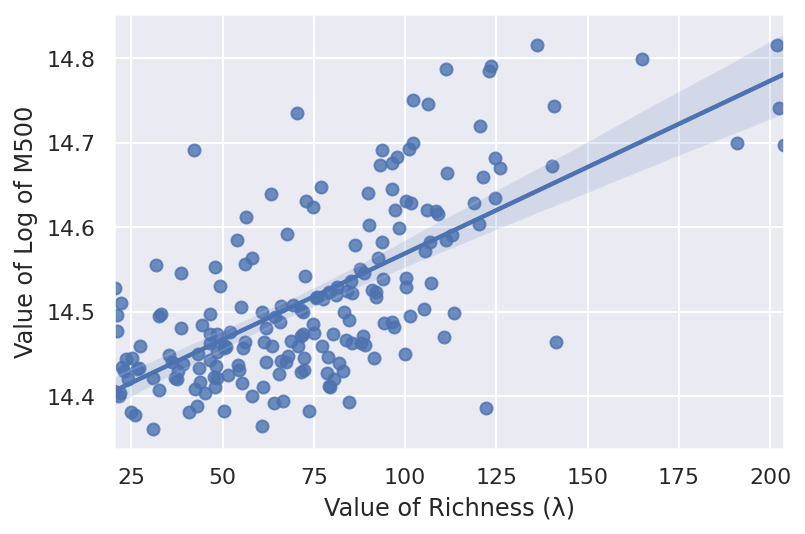

In [141]:
# With confidence interval
ax1 = sns.regplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], fit_reg=True)
ax1.set_xlabel('Value of Richness (λ)')
ax1.set_ylabel('Value of Log of M500')

Text(0, 0.5, 'Value of Log of M500')

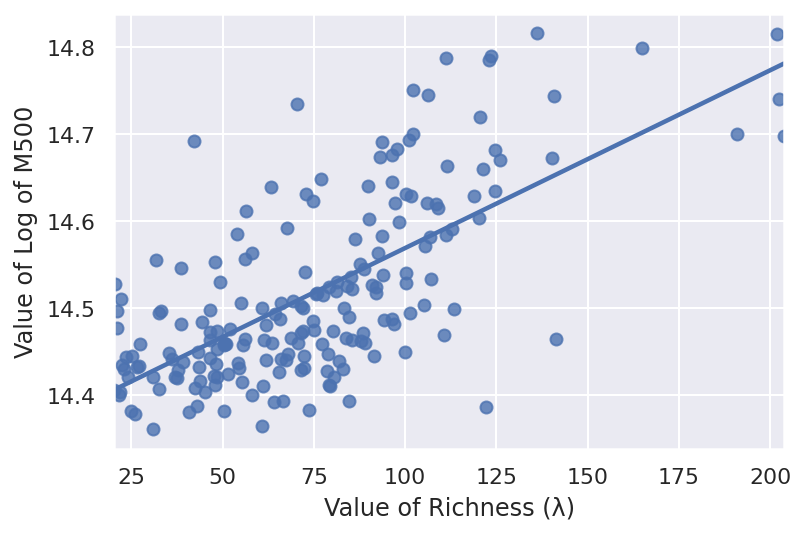

In [142]:
# Without confidence interval
ax2 = sns.regplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], fit_reg=True, ci = None)
ax2.set_xlabel('Value of Richness (λ)')
ax2.set_ylabel('Value of Log of M500')

In [143]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [144]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "blue")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = 14.36460821531415            
b_1 = 0.0020435558499231885


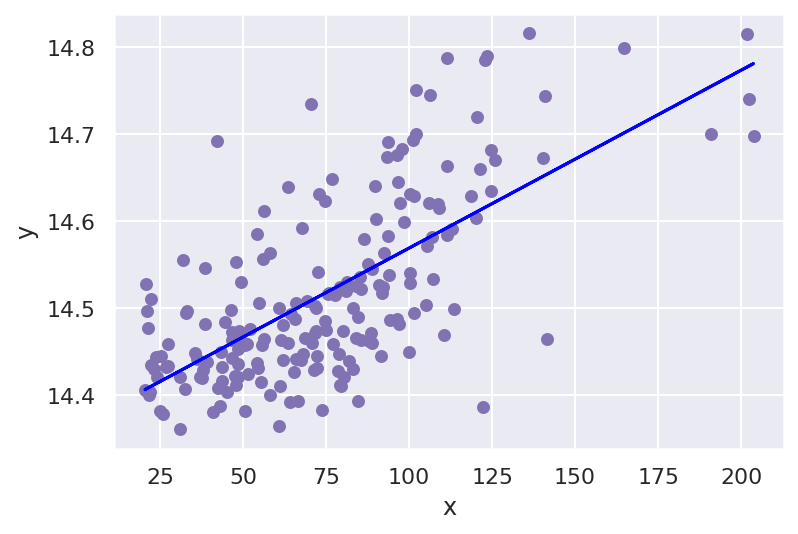

In [145]:
x = df['LAMBDA_CHISQ']
y = df['log_M500']
  
    # estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
plot_regression_line(x, y, b)

# b_0 is the y-intercept of the regression line
# b_1 is the slope of the regression line

(196,)
(196,)
(196,)
(196,)


/data0/sw/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


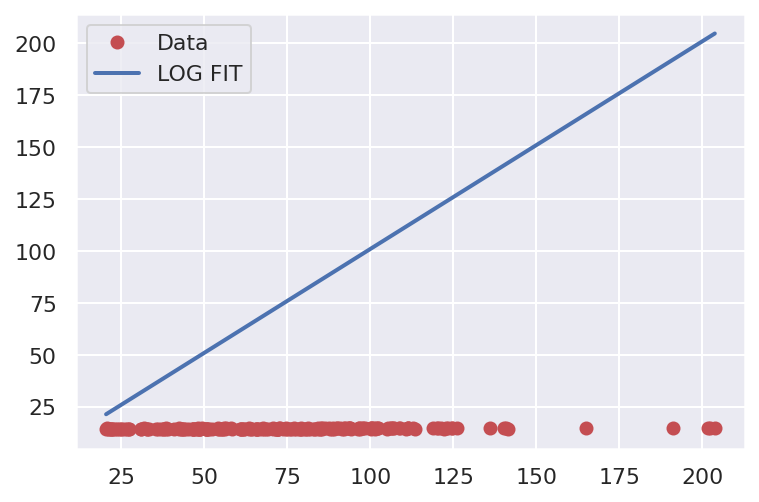

In [146]:
# Unsure why this model is not rendering

from scipy.optimize import curve_fit

richness = df['LAMBDA_CHISQ']
logMass = df['log_M500']

print(richness.shape)
richness = np.squeeze(richness)
print(richness.shape)

print(logMass.shape)
logMass = np.squeeze(logMass)
print(logMass.shape)

f=lambda x,a,b: a*x + b
fit=curve_fit(f,richness, logMass)
xsmooth=np.linspace(np.min(richness), np.max(richness), 1000)
plt.plot(richness,logMass,'ro',label='Data')
plt.plot(xsmooth,f(xsmooth,*fit[0]),'b-',linewidth=2,label='LOG FIT')
plt.legend()

In [147]:
print(fit[0])
print(fit[0][0])
print(fit[0][1])

[1. 1.]
1.0
1.0


Text(0, 0.5, 'Value of Log M500')

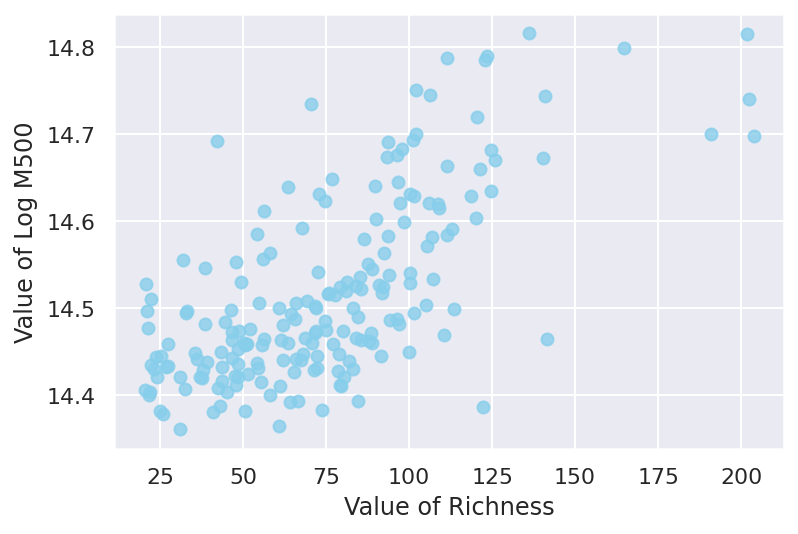

In [148]:
plt.scatter(x=df["LAMBDA_CHISQ"], y=df["log_M500"], color = "skyblue", alpha=0.8)
plt.xlabel('Value of Richness')
plt.ylabel('Value of Log M500')

# Use seaborn style: plt.style.use('seaborn')

## Creating a Generative Probabilistic Model - MCMC

In [149]:
%matplotlib inline
import pylab as plt
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt

In [150]:
# Changes the size of the graph and font
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

In [151]:
richness = df['LAMBDA_CHISQ']
logOfMass = df['log_M500']

# Converting selected columns from the pandas dataframe into a numpy array

richnessArray = df['LAMBDA_CHISQ'].to_numpy()
logOfMassArray = df['log_M500'].to_numpy()

N = 50000
x = richnessArray
y = logOfMassArray

# Implementing an error bar for every point
# within the x and y arrays
# Still do not know how to properly calculate the values of yerr
yerr = [0.4]*196

# Changing the type from tuple to an array
yerr = np.array(yerr)

In [152]:
# Checking to make sure that each array is one-dimensional
print(richnessArray.shape)
print(logOfMassArray.shape)

# If an array is not one-dimensional, use the statement below:
#(Insert name) = np.squeeze(Insert array name here)

(196,)
(196,)


Least-squares estimates:
m = 0.002 ± 0.001
b = 14.365 ± 0.068


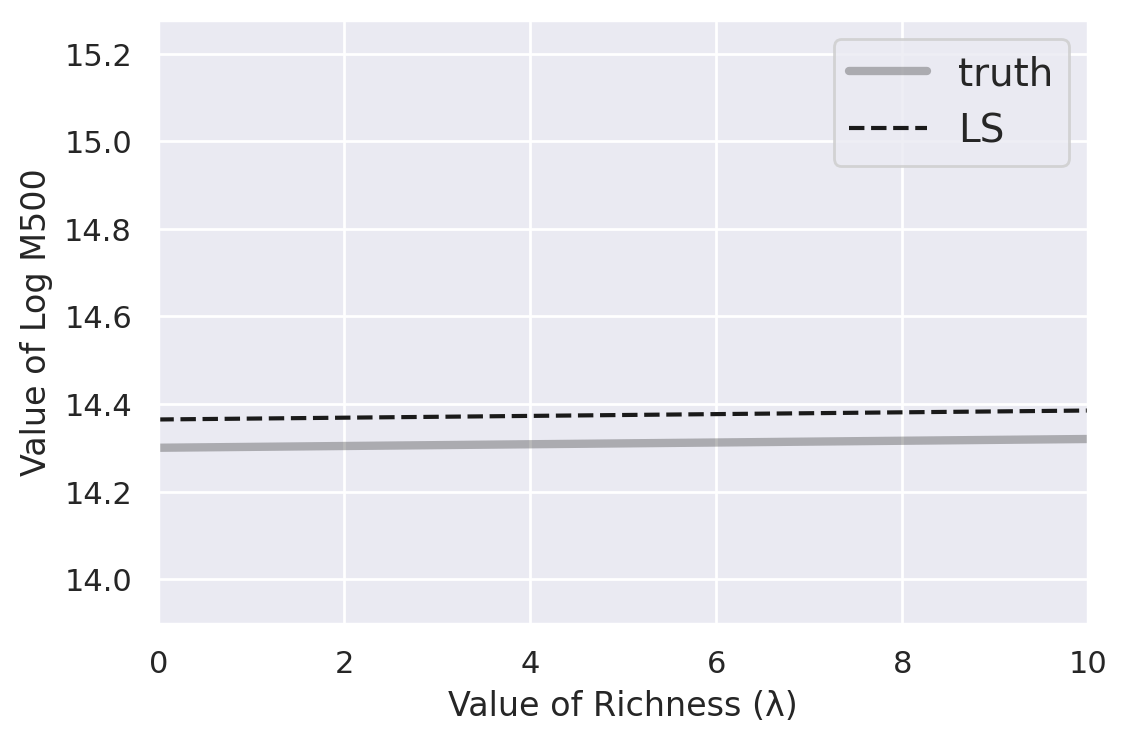

In [153]:
# From the emcee tutorial website
# How to calculate the values of yerr??
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

# Part of the made-up data in the emcee example
x0 = np.linspace(0, 10, 500)

# Requires these values to be stated???
# Included temp values below
m_true = 0.002
b_true = 14.3
f_true = 1


plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("Value of Richness (λ)")
plt.ylabel("Value of Log M500");

In [154]:
df.columns

Index(['SPT_ID', 'RA', 'DEC', 'FIELD', 'XI', 'THETA_CORE', 'REDSHIFT',
       'REDSHIFT_UNC', 'SPECZ', 'REDSHIFT_SOURCE', 'RM_PROB', 'CL_NOTES',
       'M500', 'M500_UERR', 'M500_LERR', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E',
       'RADIO_CONTAM', 'STRONG_LENS', 'IMAGE_SOURCE', 'SPECZ_REF',
       'STRONG_LENS_REF', 'PHOTOMETRIC_ZREF', 'log_M500'],
      dtype='object')

In [155]:
# Data set that displays the error of the log M500?? (LEER?)
df["M500_LERR"]

1      0.887
2      1.005
7      1.077
10     1.103
11     0.984
       ...  
428    0.897
429    0.944
430    0.815
431    0.798
432    0.888
Name: M500_LERR, Length: 196, dtype: float32

Least-squares estimates:
m = 0.002 ± 0.002
b = 14.362 ± 0.152


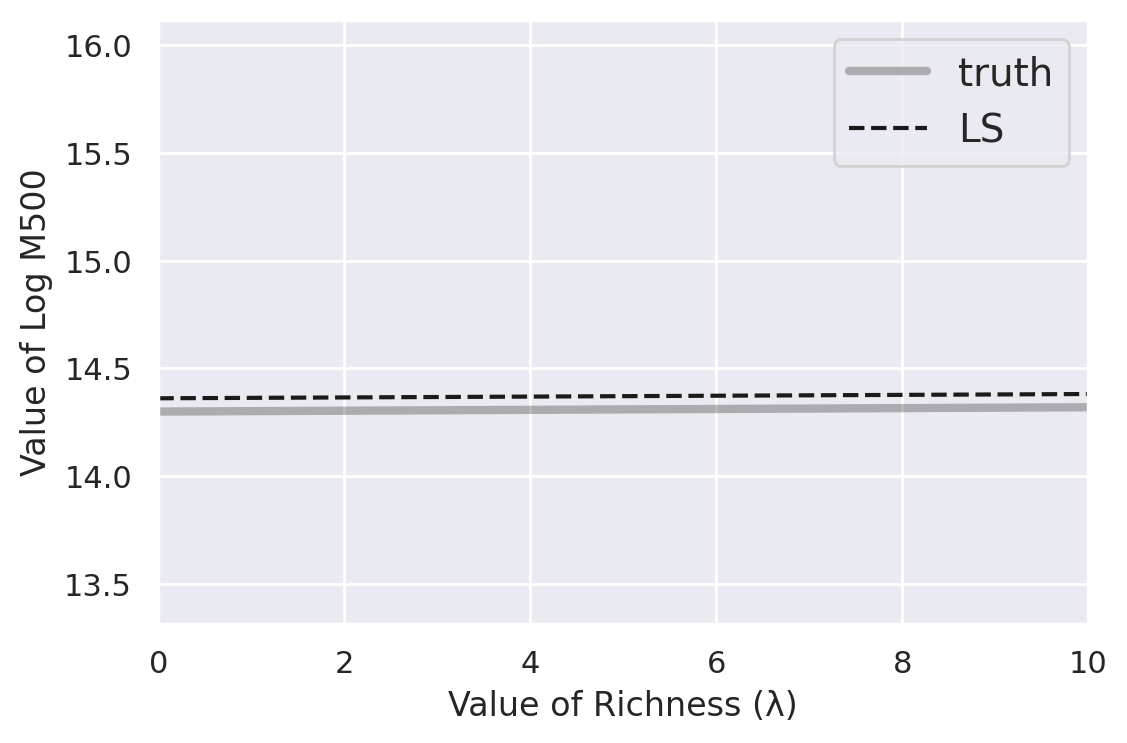

In [156]:
# From the emcee tutorial website

yerr = df["M500_LERR"]

# Changing the type from tuple to an array
yerr = np.array(yerr)

A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

# Part of the made-up data in the emcee example
x0 = np.linspace(0, 10, 500)

# Requires these values to be stated???
# Included temp values below
m_true = 0.002
b_true = 14.3
f_true = 1


plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("Value of Richness (λ)")
plt.ylabel("Value of Log M500");

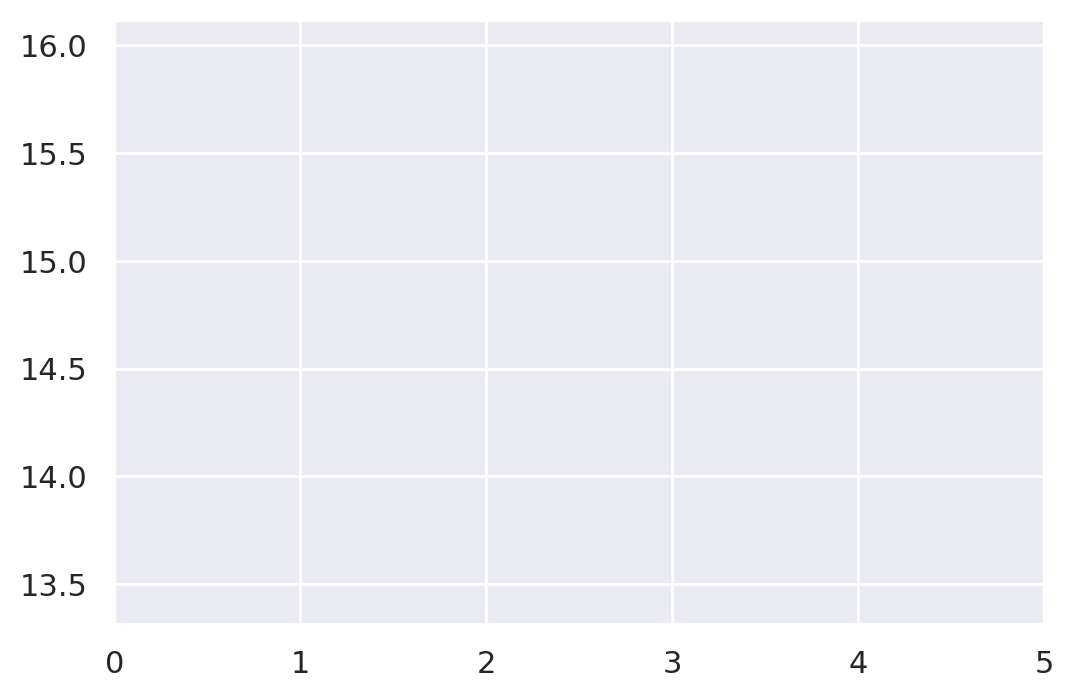

In [157]:
# From the "Practical MCMC in Python" website

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100  # This makes all the plots a little bigger.

# Plot the data with error bars.
plt.errorbar(richnessArray, logOfMassArray, yerr=yerr, fmt=".k", capsize=0)
plt.xlim(0, 5);

A = np.vander(x, 2)  # Take a look at the documentation to see what this function does!
ATA = np.dot(A.T, A / yerr[:, None]**2)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
V = np.linalg.inv(ATA)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
for m, b in np.random.multivariate_normal(w, V, size=50):
    plt.plot(x, m*x + b, "g", alpha=0.1)
plt.xlim(0, 5);

# Not sure why this model is not rendering

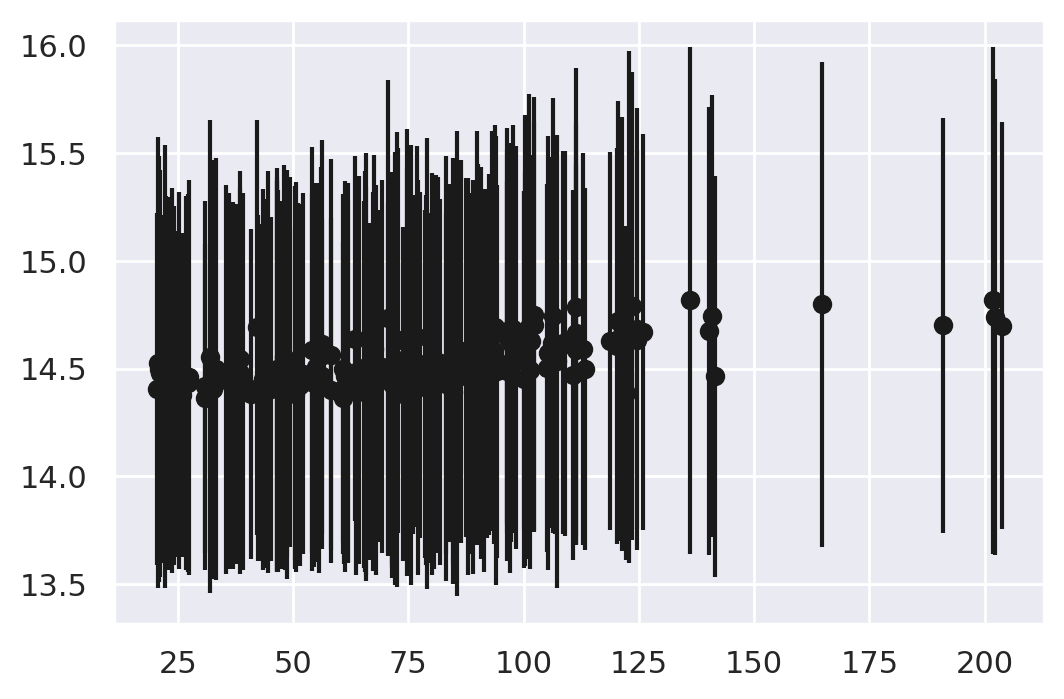

In [158]:
plt.errorbar(x, y, yerr=yerr, fmt='o', color='k');